<a href="https://colab.research.google.com/github/constantinouelenios-IB2AD0/constantinouelenios-IB2AD0-DataScience-GenAI-Submissions/blob/main/WEEK__3_SEMINAR_EXERCISE_COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a comprehensive Exploratory Data Analysis (EDA) on the "titanic.csv" dataset to understand its structure, identify missing values, analyze distributions of numerical and categorical features, explore relationships between features, and summarize key insights.

## Load Dataset

### Subtask:
Load the 'titanic.csv' dataset into a pandas DataFrame.


**Reasoning**:
First, I'll import the pandas library, which is essential for working with DataFrames in Python.



In [ ]:
import pandas as pd
print("pandas library imported.")

pandas library imported.


### Check for 'titanic.csv' and Upload if Necessary

In Google Colab, you can check for the presence of 'titanic.csv' in the file browser (the folder icon on the left sidebar). If the file is not there, you can upload it directly by clicking the 'Upload to session storage' icon (an arrow pointing up) in the file browser and selecting 'titanic.csv' from your local machine. Alternatively, you can use the following code to upload the file if you are running this in a different environment or prefer programmatic upload:

```python
# from google.colab import files
# import os
# if not os.path.exists('titanic.csv'):
#   uploaded = files.upload()
#   for fn in uploaded.keys():
#     print('User uploaded file "{name}" with length {length} bytes'.format(
#         name=fn, length=len(uploaded[fn])))
# else:
#   print("titanic.csv already exists.")
```

**Reasoning**:
Now that the pandas library is imported and the user has been instructed on how to ensure the 'titanic.csv' file is available, I will proceed to load the dataset into a DataFrame and display its first few rows to verify the load was successful.



In [ ]:
df = pd.read_csv('titanic.csv')
print("Dataset 'titanic.csv' loaded successfully into DataFrame 'df'.")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

## Summary of EDA Process and Techniques Used

### 1. Data Loading and Initial Inspection

*   **Objective**: Get the dataset into the environment and understand its basic structure.
*   **Features/Columns involved**: All columns (`PassengerId`, `Survived`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, `Embarked`).
*   **Techniques/Libraries Used**:
    *   `pandas` for data manipulation (`pd.read_csv`).
    *   `os` and `requests` for programmatic file download to ensure data availability.
    *   `df.head()` to view the first few rows.
    *   `df.info()` to get a concise summary of the DataFrame, including data types and non-null values.

### 2. Descriptive Statistics

*   **Objective**: Understand the central tendency, dispersion, and shape of numerical features.
*   **Features/Columns involved**: All numerical columns (`PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`).
*   **Techniques/Libraries Used**:
    *   `df.describe()` to generate summary statistics for numerical columns.

### 3. Explore Missing Values

*   **Objective**: Identify the extent and location of missing data for cleaning and imputation strategies.
*   **Features/Columns involved**: All columns, specifically `Cabin`, `Age`, and `Embarked` were identified as having missing values.
*   **Techniques/Libraries Used**:
    *   `df.isnull().sum()` to count missing values per column.
    *   `(df.isnull().sum() / len(df)) * 100` to calculate the percentage of missing values.
    *   `matplotlib.pyplot` and `seaborn` (`sns.barplot`) for visualizing missing value percentages.

### 4. Analyze Categorical Features

*   **Objective**: Examine the distribution of categorical features and prepare for relationship analysis.
*   **Features/Columns involved**: `Sex`, `Embarked`, `Survived`, `Pclass`, and the newly engineered `Deck`.
*   **Techniques/Libraries Used**:
    *   `df.select_dtypes(include='object').columns.tolist()` to identify object type columns.
    *   Manually adding `Survived` and `Pclass` to the categorical list.
    *   List comprehensions to exclude high-cardinality/unsuitable columns (`Name`, `Ticket`, `Cabin`).
    *   `df[col].value_counts()` to count occurrences of each category.
    *   `matplotlib.pyplot` and `seaborn` (`sns.countplot`) for visualizing categorical distributions.
    *   **Feature Engineering**: Created `Deck` column by extracting the first letter from `Cabin` and handling 'NaN' as 'Unknown'.

### 5. Analyze Numerical Features

*   **Objective**: Visualize the distribution of numerical features to identify outliers, skewness, and spread.
*   **Features/Columns involved**: `Age`, `SibSp`, `Parch`, `Fare`.
*   **Techniques/Libraries Used**:
    *   `df.select_dtypes(include=['int64', 'float64']).columns.tolist()` to identify numerical columns.
    *   List comprehensions to exclude `PassengerId`, `Survived`, `Pclass`.
    *   `matplotlib.pyplot` and `seaborn` (`sns.histplot` and `sns.boxplot`) for visualizing numerical distributions (histograms for density, box plots for outliers and quartiles).

### 6. Explore Relationships

*   **Objective**: Investigate how different features relate to the 'Survived' column.
*   **Features/Columns involved**: `Sex`, `Embarked`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare` against `Survived`.
*   **Techniques/Libraries Used**:
    *   `matplotlib.pyplot` and `seaborn` (`sns.countplot`) to visualize categorical features vs. `Survived`.
    *   `matplotlib.pyplot` and `seaborn` (`sns.violinplot`) to visualize numerical features vs. `Survived` (showing distribution and density across survival categories).

This structured approach allowed us to systematically understand the dataset, identify potential issues like missing data, and uncover interesting patterns related to survival on the Titanic.

### Extract Deck from Cabin

In [ ]:
# Extract the first letter of the Cabin as 'Deck'
df['Deck'] = df['Cabin'].astype(str).str[0]

# Replace 'n' (from NaN) with 'Unknown' for missing values
df['Deck'] = df['Deck'].replace('n', 'Unknown')

# Drop the original 'Cabin' column if it's no longer needed, or keep for other analysis
# For now, we will keep it but focus on 'Deck'.

print("Value counts for the new 'Deck' column:")
print(df['Deck'].value_counts())

# Add 'Deck' to the categorical columns for future analysis
categorical_cols.append('Deck')
print(f"\nUpdated categorical columns list: {categorical_cols}")

Value counts for the new 'Deck' column:
Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

Updated categorical columns list: ['Sex', 'Embarked', 'Survived', 'Pclass', 'Deck']


### Unique Values in 'Cabin' Column

In [ ]:
print("Number of unique non-missing values in 'Cabin':")
print(df['Cabin'].nunique())
print("\nTop 10 most frequent non-missing 'Cabin' values:")
print(df['Cabin'].value_counts().head(10))

Number of unique non-missing values in 'Cabin':
147

Top 10 most frequent non-missing 'Cabin' values:
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
E101           3
C22 C26        3
F33            3
C83            2
C123           2
Name: count, dtype: int64


**Reasoning**:
The previous code failed because 'titanic.csv' was not found. To fix this, I will modify the cell to first check if the file exists and, if not, download it programmatically from a public source before attempting to load it into a pandas DataFrame. This ensures the necessary file is present for `pd.read_csv`.



In [ ]:
import os
import requests

file_path = 'titanic.csv'

# Check if the file exists, if not, download it
if not os.path.exists(file_path):
    print(f"'{file_path}' not found. Attempting to download from a public source...")
    # A common public URL for the titanic.csv dataset
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    try:
        response = requests.get(url, allow_redirects=True)
        response.raise_for_status() # Raise an exception for HTTP errors
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"'{file_path}' downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading '{file_path}': {e}")
        # Re-raise the exception to stop execution if download fails
        raise
else:
    print(f"'{file_path}' already exists.")

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)
print("Dataset 'titanic.csv' loaded successfully into DataFrame 'df'.")
df.head()

'titanic.csv' not found. Attempting to download from a public source...
'titanic.csv' downloaded successfully.
Dataset 'titanic.csv' loaded successfully into DataFrame 'df'.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial Data Inspection

### Subtask:
Perform an initial inspection of the dataset by displaying the first few rows, checking data types, and identifying the number of non-null values for each column.


**Reasoning**:
To perform the initial inspection, I will use `df.head()` to display the first 5 rows and `df.info()` to show data types and non-null counts for each column in a single code block, as instructed.



In [ ]:
print("First 5 rows of the DataFrame:")
df.head()

print("\nDataFrame Info (data types and non-null counts):")
df.info()

First 5 rows of the DataFrame:

DataFrame Info (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Descriptive Statistics

### Subtask:
Generate descriptive statistics for numerical columns to understand their central tendency, dispersion, and shape.


**Reasoning**:
To generate descriptive statistics for numerical columns, I will use the `describe()` method on the DataFrame `df` and print the result.



In [ ]:
print("Descriptive statistics for numerical columns:")
df.describe()

Descriptive statistics for numerical columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Explore Missing Values

### Subtask:
Identify and visualize the extent of missing values in each column, which is crucial for data cleaning and imputation strategies.


**Reasoning**:
First, I'll calculate the count and percentage of missing values for each column and consolidate this information into a new DataFrame to provide a clear summary of missing data. Then, I will print this summary DataFrame. This step addresses the first four instructions of the subtask.



In [ ]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_values_df = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})

missing_values_df = missing_values_df[missing_values_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Summary of Missing Values:")
print(missing_values_df)

Summary of Missing Values:
          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


**Reasoning**:
To visualize the extent of missing values, I will import `matplotlib.pyplot` and `seaborn`, then create a bar plot using the `missing_values_df` to show the percentage of missing values for each column, and finally display the plot. This addresses instructions 5, 6, and 7 of the subtask.



/tmp/ipython-input-2111247938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_df.index, y='Missing Percentage', data=missing_values_df, palette='viridis')


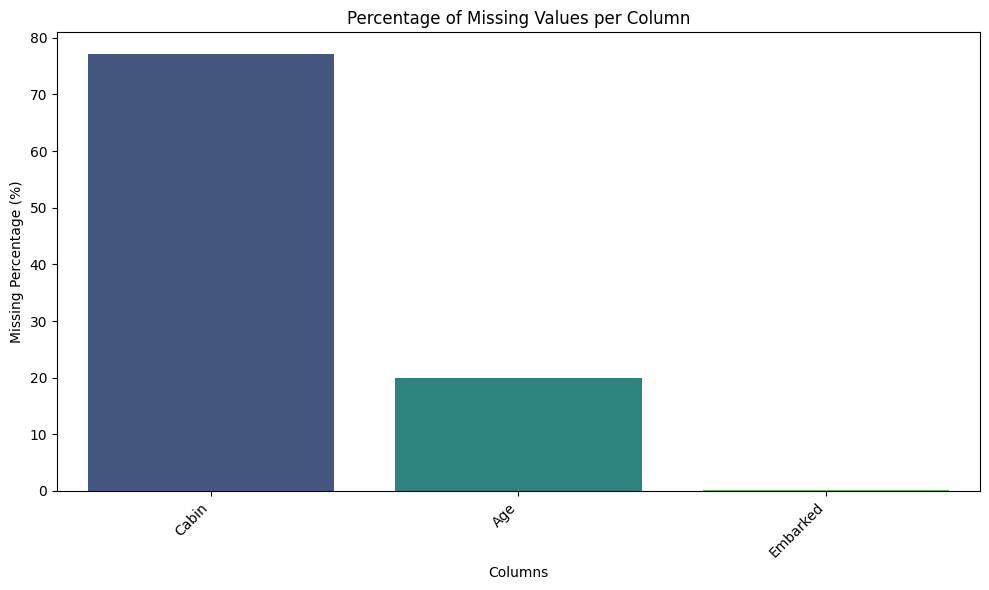

Bar plot visualizing missing values displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_df.index, y='Missing Percentage', data=missing_values_df, palette='viridis')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot visualizing missing values displayed.")

**Reasoning**:
The previous code generated a `FutureWarning` regarding the use of `palette` without `hue` in `seaborn.barplot`. To address this, I will modify the `sns.barplot` call to explicitly assign the x-axis variable to `hue` and set `legend=False`, as suggested by the warning, ensuring future compatibility and clear visualization.



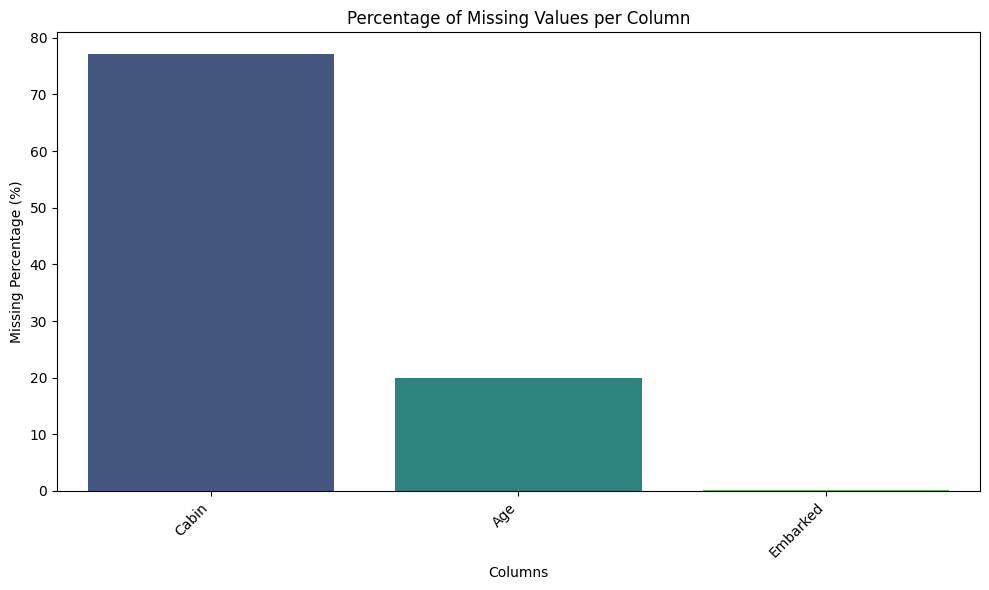

Bar plot visualizing missing values displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_df.index, y='Missing Percentage', data=missing_values_df, hue=missing_values_df.index, legend=False, palette='viridis')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot visualizing missing values displayed.")

## Analyze Categorical Features

### Subtask:
Examine the distribution of categorical features using value counts and visualize them with appropriate plots (e.g., bar plots) to understand passenger demographics and characteristics.


### Identify Categorical Columns

**Reasoning**:
To effectively analyze categorical features, the first step is to identify them within the dataset. Based on the `df.info()` output, columns with `object` data types (like 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked') are clearly categorical. Additionally, columns such as 'Survived' and 'Pclass', although represented as `int64`, intrinsically represent categories (e.g., survived/not survived, passenger class 1/2/3) and should be treated as categorical for this analysis.

I will create a list of these identified categorical columns for further processing.

**Reasoning**:
Now that the categorical columns have been identified, I will create a list of these columns in a code block, which will be used for further analysis and visualization.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.extend(['Survived', 'Pclass'])

# Exclude 'Name', 'Ticket', and 'Cabin' as they are not suitable for direct bar plot visualization due to high cardinality or specific content
# 'Name' is unique for each passenger, 'Ticket' has many unique values, and 'Cabin' has too many missing values and unique values.
categorical_cols = [col for col in categorical_cols if col not in ['Name', 'Ticket', 'Cabin']]

print("Identified Categorical Columns:")
print(categorical_cols)

Identified Categorical Columns:
['Sex', 'Embarked', 'Survived', 'Pclass']


**Reasoning**:
Following the identification of categorical columns, I will now iterate through each of these columns to calculate and print their respective value counts, which provides a quantitative summary of the distribution of categories within each feature.



In [ ]:
print("Value Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


Value Counts for Categorical Columns:

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Embarked ---
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

--- Survived ---
Survived
0    549
1    342
Name: count, dtype: int64

--- Pclass ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


**Reasoning**:
To fulfill the subtask's requirement of visualizing categorical feature distributions, I will now iterate through each identified categorical column and create a bar plot for each using `seaborn.countplot`, ensuring proper titles, labels, and display of each plot.



Visualizing distribution of categorical columns:


/tmp/ipython-input-1150548738.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


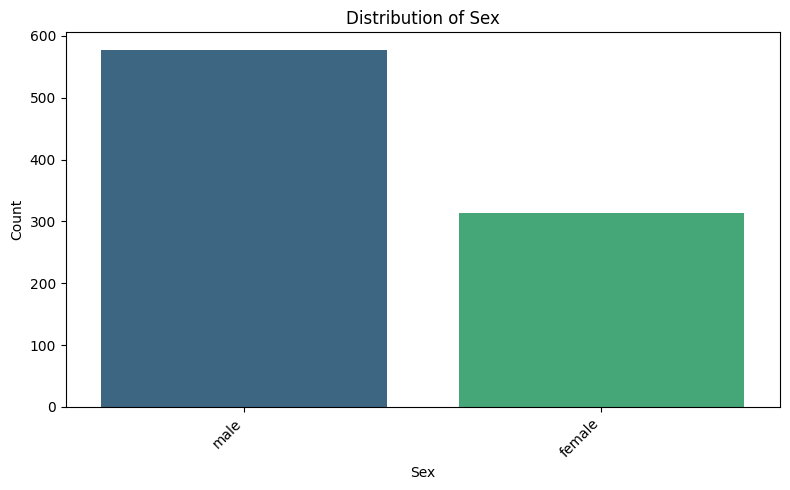

/tmp/ipython-input-1150548738.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


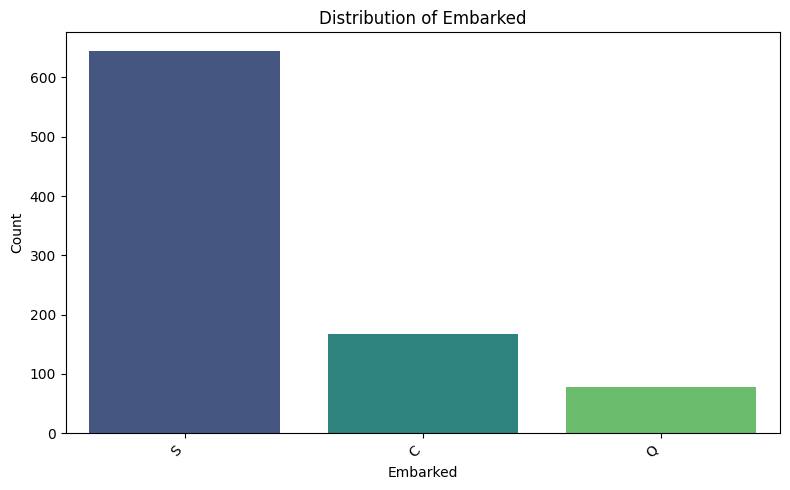

/tmp/ipython-input-1150548738.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


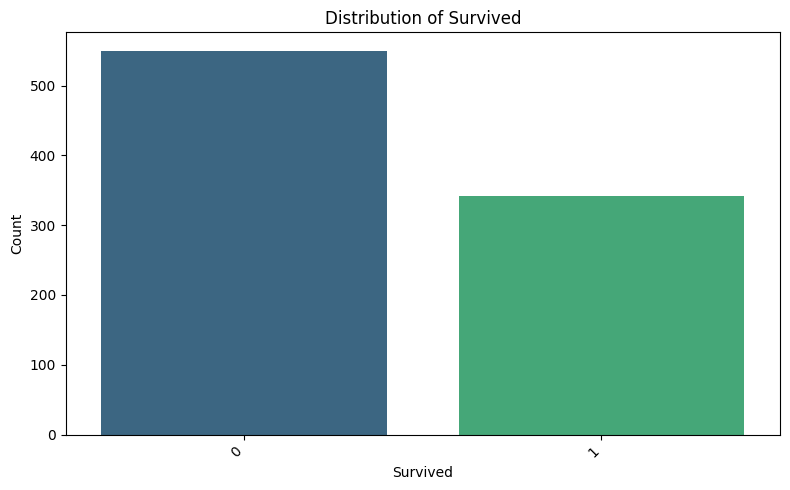

/tmp/ipython-input-1150548738.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


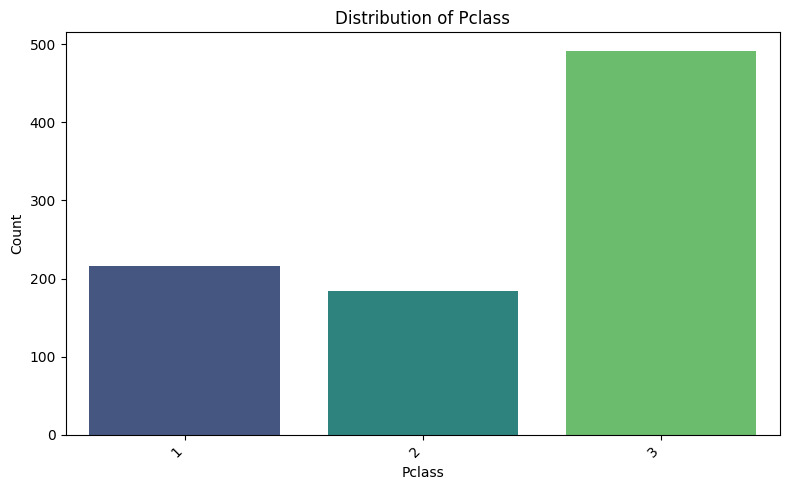

Bar plots for all identified categorical columns displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing distribution of categorical columns:")

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
print("Bar plots for all identified categorical columns displayed.")

**Reasoning**:
The previous code generated a `FutureWarning` regarding the use of `palette` without `hue` in `seaborn.countplot`. To address this, I will modify the `sns.countplot` call to explicitly assign the x-axis variable to `hue` and set `legend=False`, as suggested by the warning, ensuring future compatibility and clear visualization.



Visualizing distribution of categorical columns:


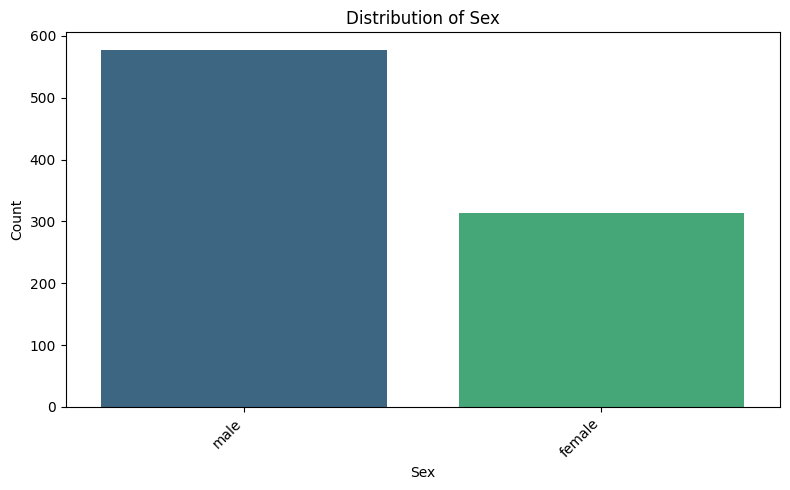

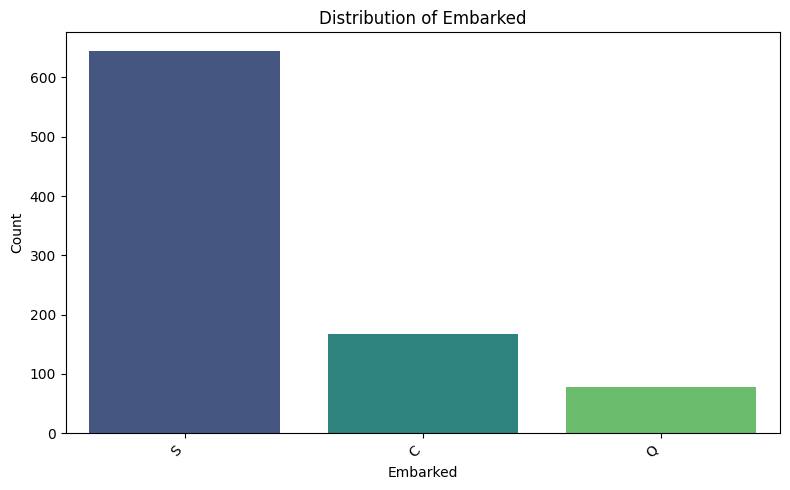

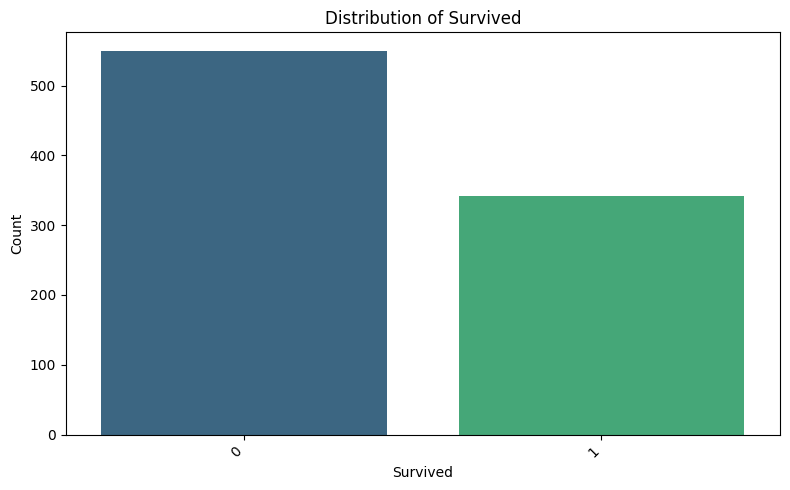

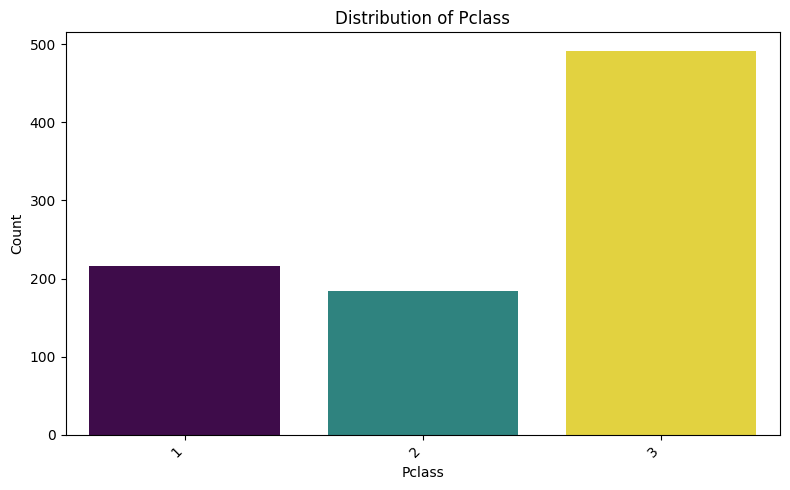

Bar plots for all identified categorical columns displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing distribution of categorical columns:")

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue=col, legend=False, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
print("Bar plots for all identified categorical columns displayed.")

## Analyze Numerical Features

### Subtask:
Visualize the distribution of numerical features using histograms or box plots to identify outliers, skewness, and overall data spread.


**Reasoning**:
To begin analyzing numerical features as per the subtask, I will first identify all numerical columns (int64 or float64 data types) from the DataFrame `df` and then exclude 'PassengerId', 'Survived', and 'Pclass', as these are either identifiers or have been designated as categorical for this analysis. This step will prepare the list of columns for subsequent visualization.



In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'PassengerId' as it is an identifier, and 'Survived', 'Pclass' as they are treated as categorical.
exclude_cols = ['PassengerId', 'Survived', 'Pclass']
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

print("Identified Numerical Columns for Analysis:")
print(numerical_cols)

Identified Numerical Columns for Analysis:
['Age', 'SibSp', 'Parch', 'Fare']


**Reasoning**:
Now that the numerical columns have been identified, I will iterate through each of them to create side-by-side histogram and box plot visualizations, as requested. The histogram will show the overall distribution and density, while the box plot will highlight the central tendency, spread, and potential outliers, thus fulfilling the subtask's visualization requirements.



Visualizing distribution of numerical columns:


/tmp/ipython-input-843641747.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis')
/tmp/ipython-input-843641747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='viridis')


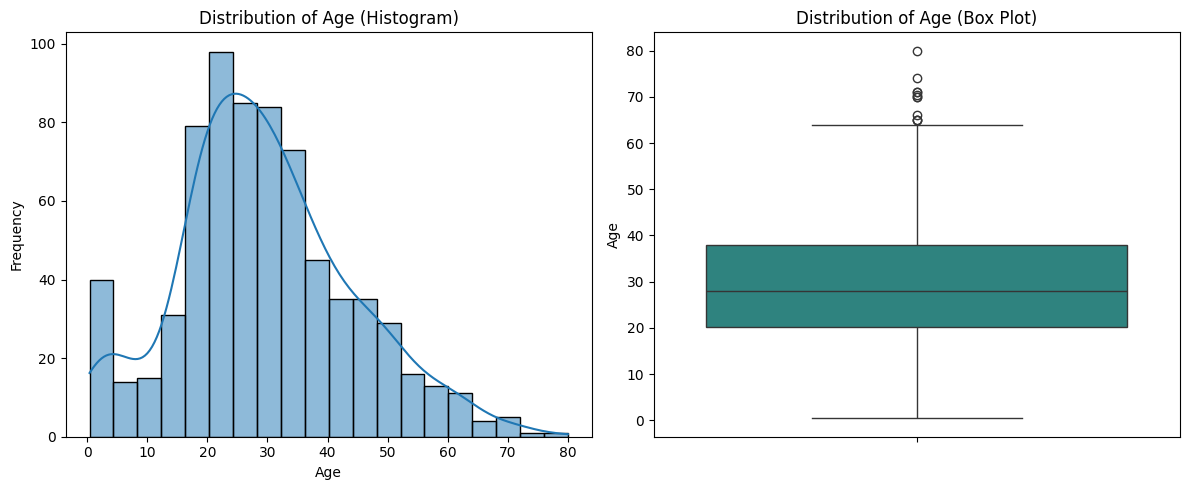

/tmp/ipython-input-843641747.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis')
/tmp/ipython-input-843641747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='viridis')


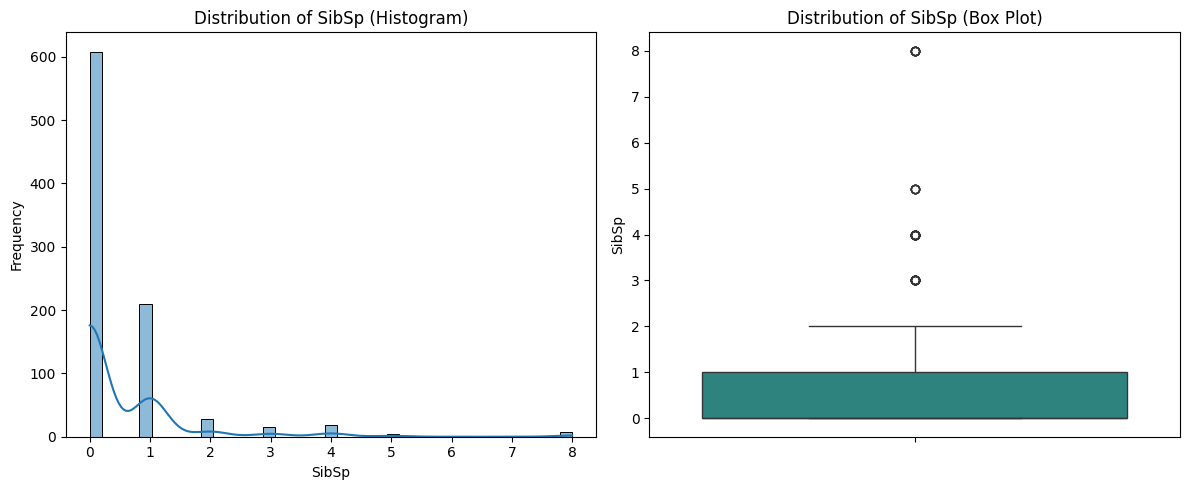

/tmp/ipython-input-843641747.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis')
/tmp/ipython-input-843641747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='viridis')


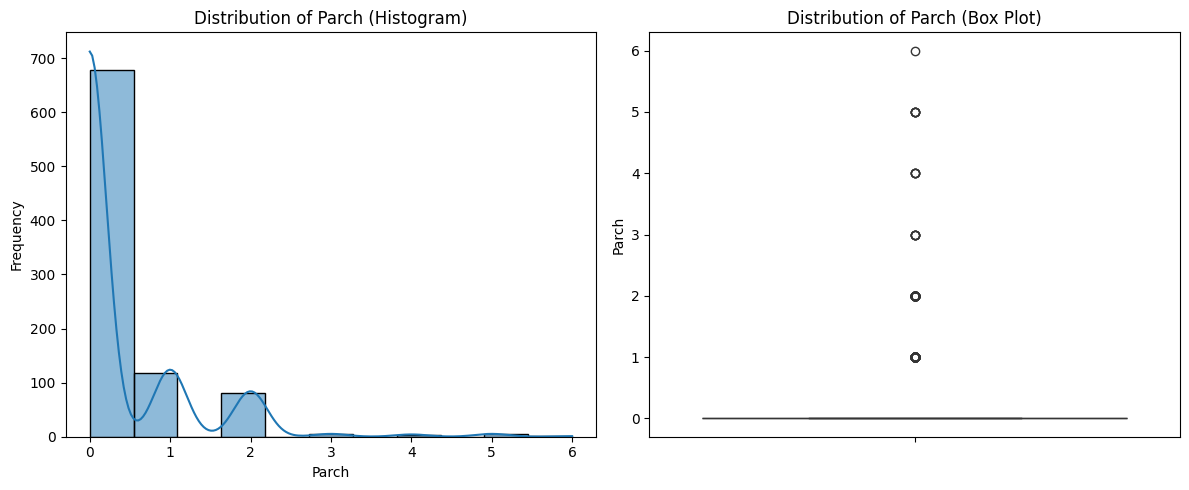

/tmp/ipython-input-843641747.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, kde=True, palette='viridis')
/tmp/ipython-input-843641747.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='viridis')


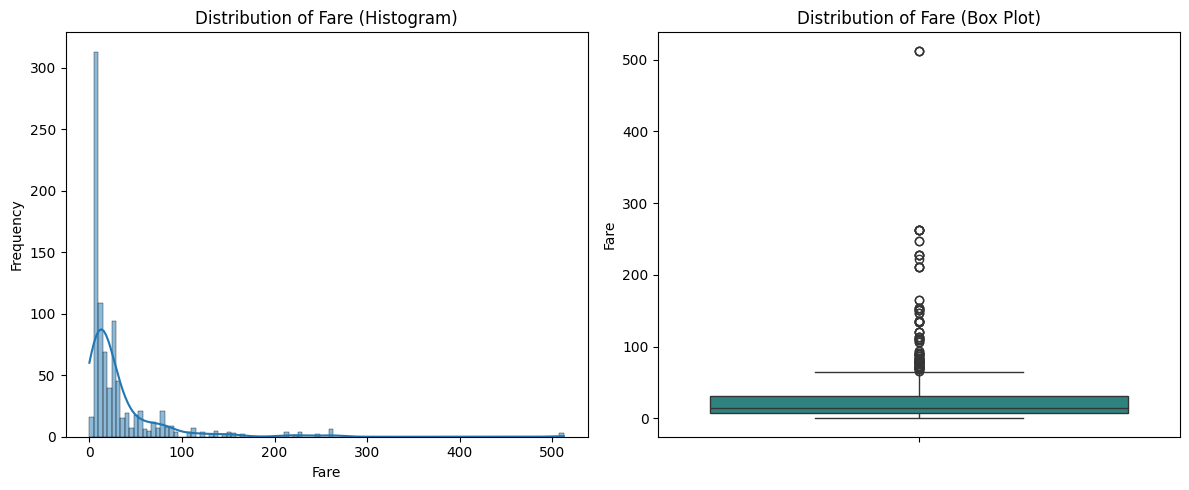

Histograms and box plots for all identified numerical columns displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing distribution of numerical columns:")

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(data=df, x=col, kde=True, palette='viridis')
    plt.title(f'Distribution of {col} (Histogram)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(data=df, y=col, palette='viridis')
    plt.title(f'Distribution of {col} (Box Plot)')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

print("Histograms and box plots for all identified numerical columns displayed.")

**Reasoning**:
The previous code generated `UserWarning` and `FutureWarning` regarding the use of `palette` without a `hue` variable in `seaborn.histplot` and `seaborn.boxplot`. To address this, I will remove the `palette` argument from both plotting functions, as it is not being used to categorize data and is causing the warnings.



Visualizing distribution of numerical columns:


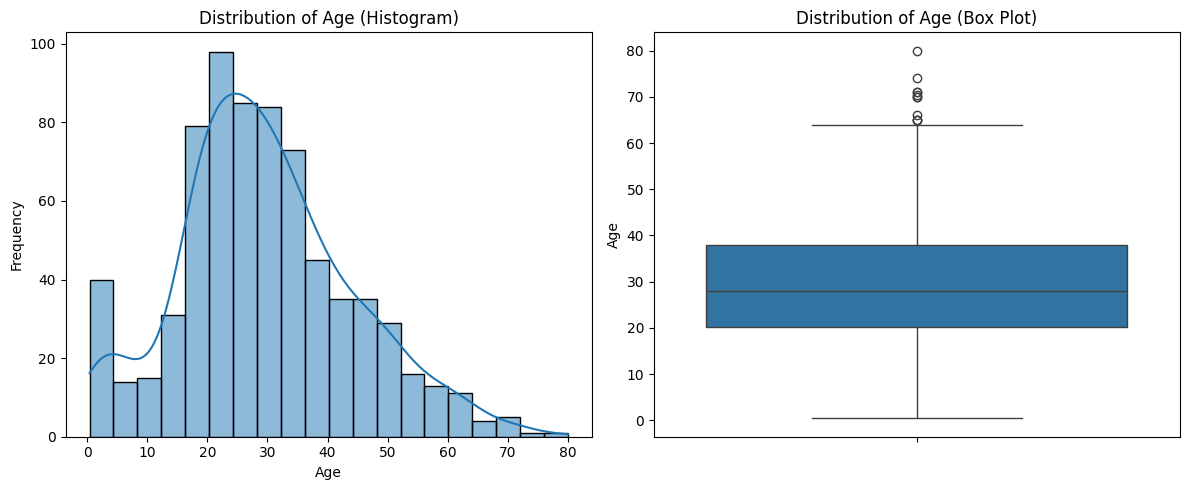

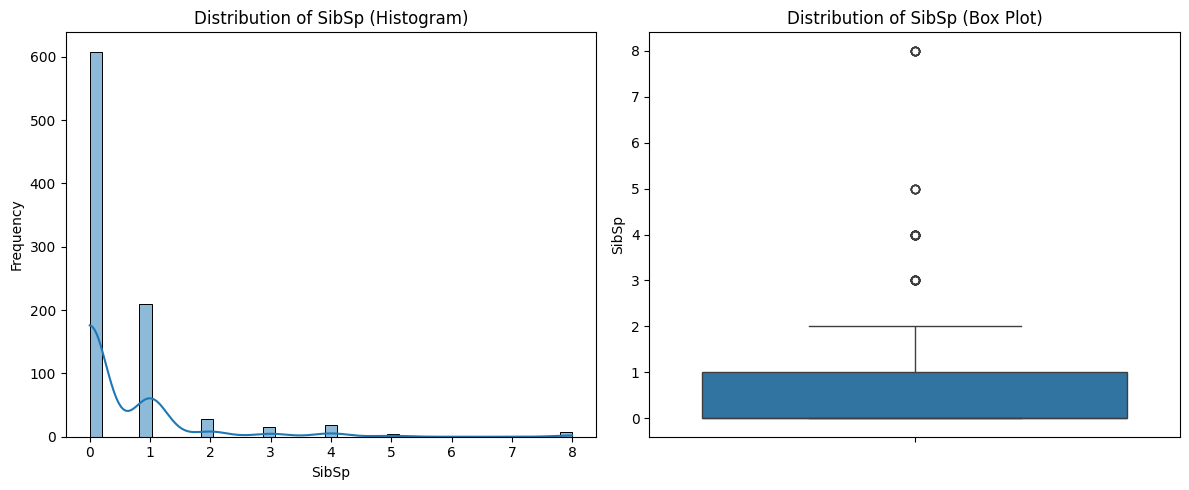

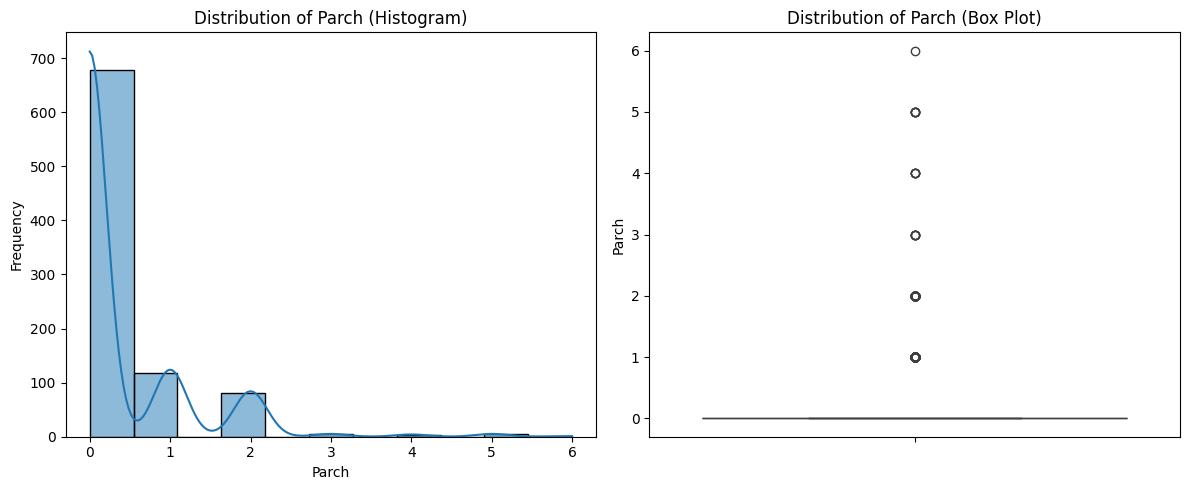

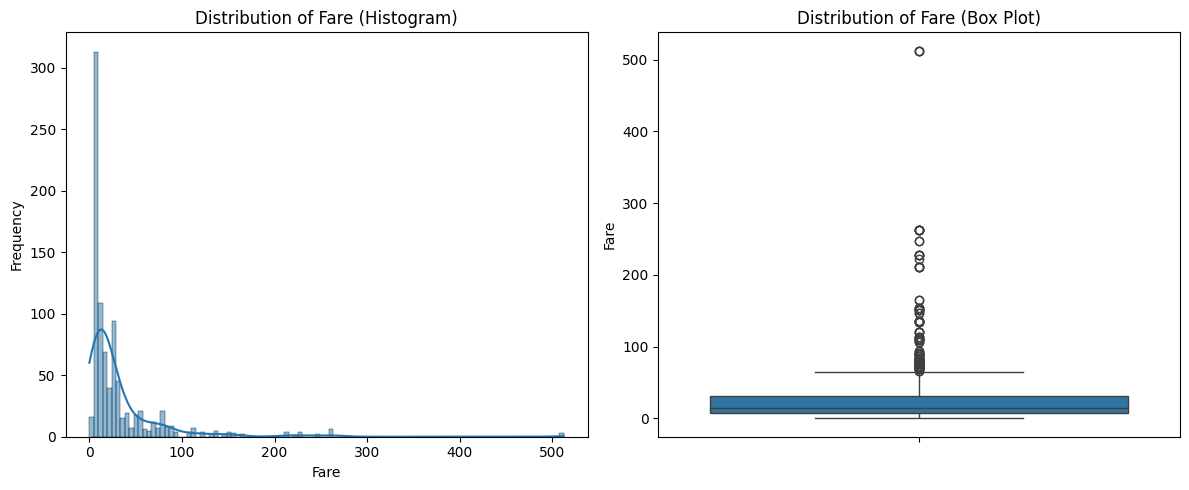

Histograms and box plots for all identified numerical columns displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing distribution of numerical columns:")

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col} (Histogram)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(data=df, y=col)
    plt.title(f'Distribution of {col} (Box Plot)')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

print("Histograms and box plots for all identified numerical columns displayed.")

## Explore Relationships

### Subtask:
Investigate relationships between features, especially with the 'Survived' column, to uncover potential patterns and insights using visualizations like count plots or violin plots.


**Reasoning**:
To investigate the relationships between categorical features and the 'Survived' column, I will iterate through each identified categorical column (excluding 'Survived' itself) and create count plots, with 'Survived' as the hue, as per the instructions. Then, to investigate relationships between numerical features and the 'Survived' column, I will iterate through each numerical column and create violin plots, with 'Survived' on the x-axis and the numerical column on the y-axis. This fulfills the subtask's requirement to visualize relationships.



Visualizing relationships between features and 'Survived':

Categorical features vs. Survived:


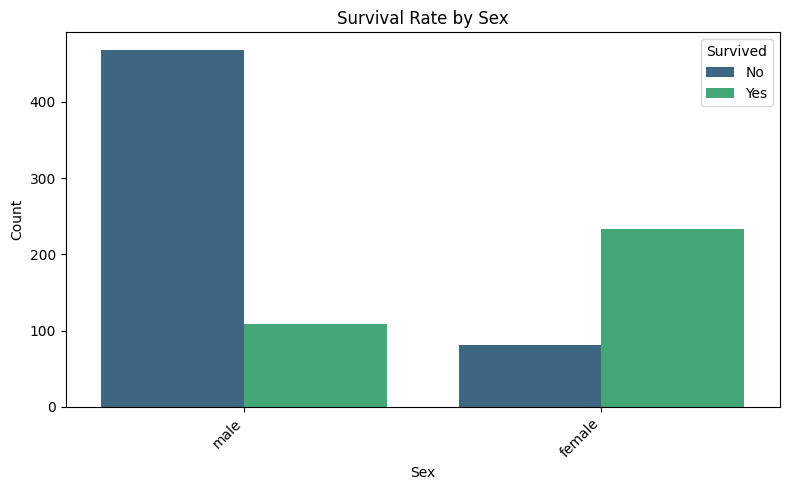

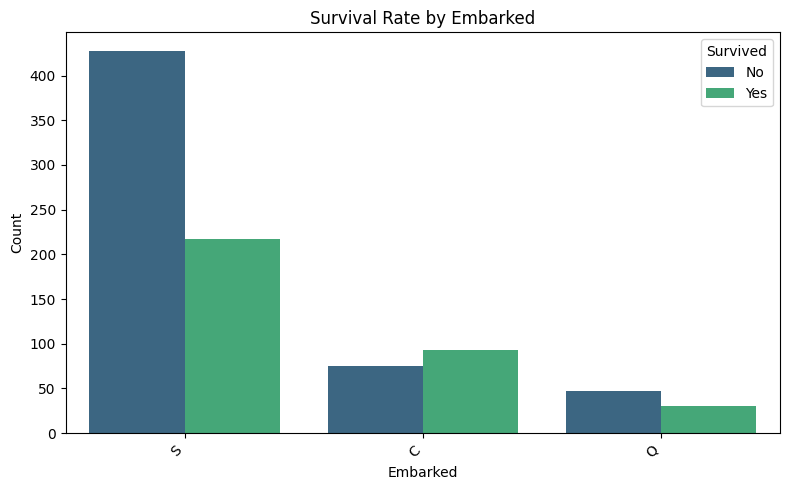

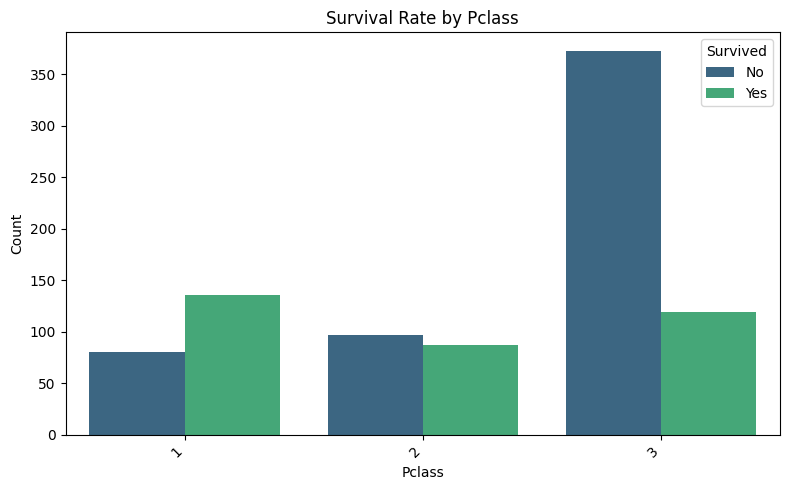


Numerical features vs. Survived:


/tmp/ipython-input-207312795.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y=col, palette='viridis')


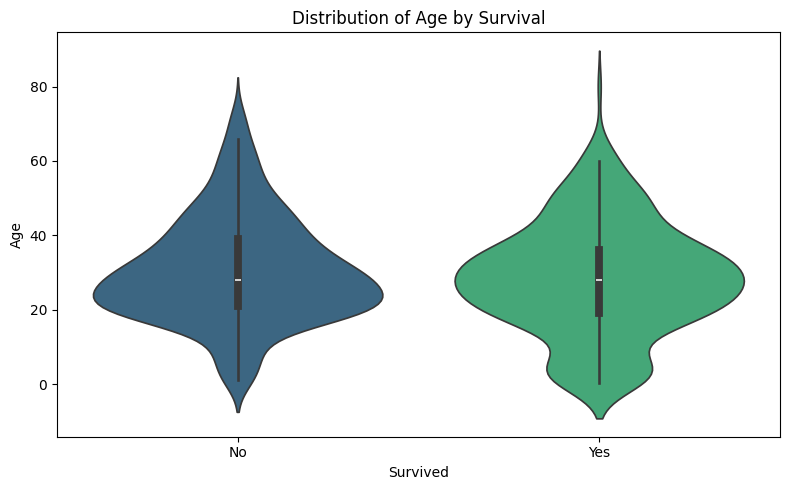

/tmp/ipython-input-207312795.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y=col, palette='viridis')


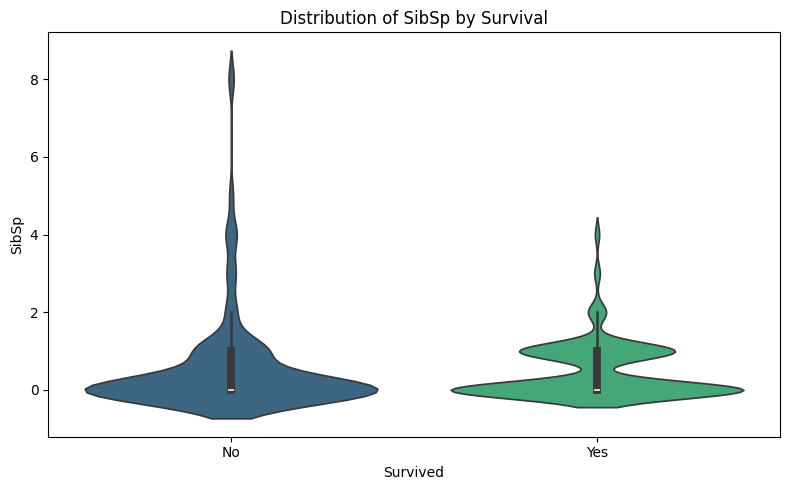

/tmp/ipython-input-207312795.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y=col, palette='viridis')


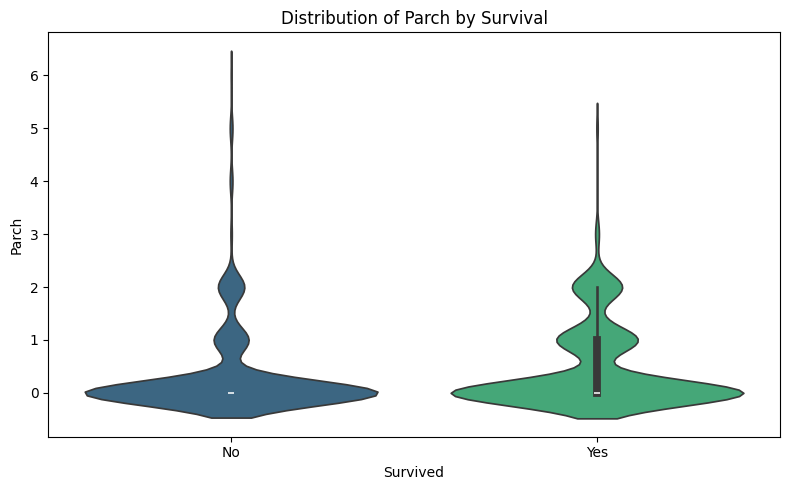

/tmp/ipython-input-207312795.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y=col, palette='viridis')


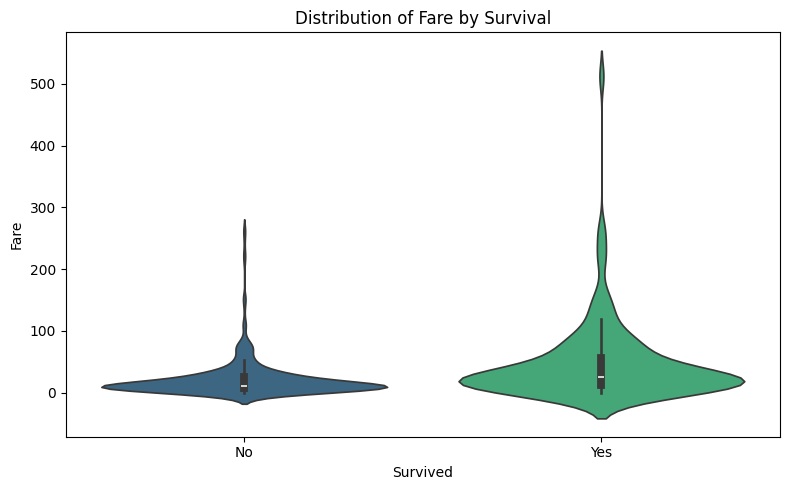

All requested relationship plots displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing relationships between features and 'Survived':\n")

# --- Categorical features vs. Survived ---
print("Categorical features vs. Survived:")
for col in categorical_cols:
    if col != 'Survived': # Exclude 'Survived' itself when plotting against 'Survived'
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue='Survived', palette='viridis')
        plt.title(f'Survival Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()

# --- Numerical features vs. Survived ---
print("\nNumerical features vs. Survived:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x='Survived', y=col, palette='viridis')
    plt.title(f'Distribution of {col} by Survival')
    plt.xlabel('Survived')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()

print("All requested relationship plots displayed.")

**Reasoning**:
The previous code generated a `FutureWarning` for `seaborn.violinplot` when `palette` was used without explicitly assigning `hue`. To address this, I will modify the `sns.violinplot` call to include `hue='Survived'` and `legend=False`, as suggested by the warning, ensuring future compatibility and clear visualization.



Visualizing relationships between features and 'Survived':

Categorical features vs. Survived:


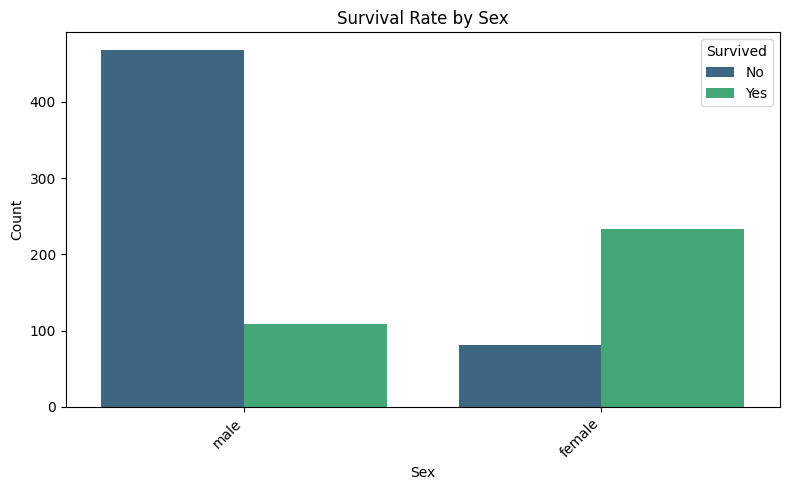

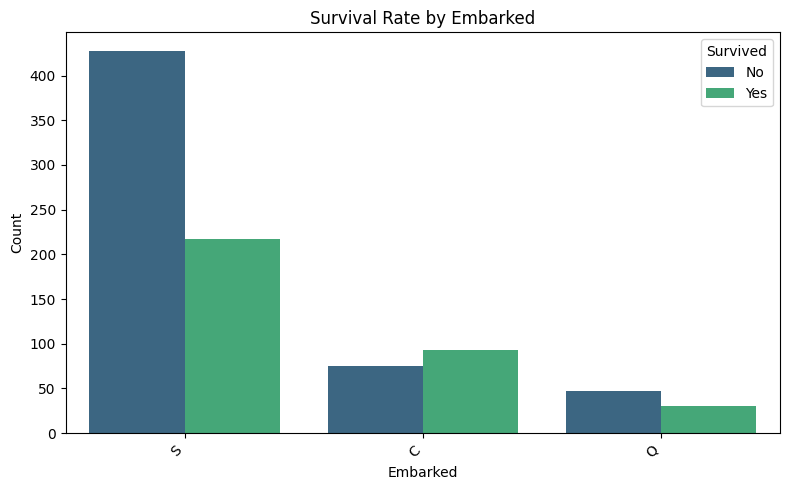

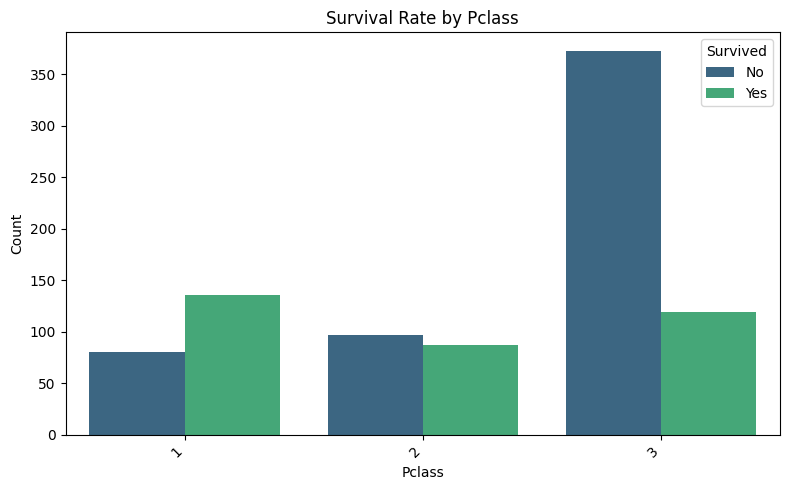


Numerical features vs. Survived:


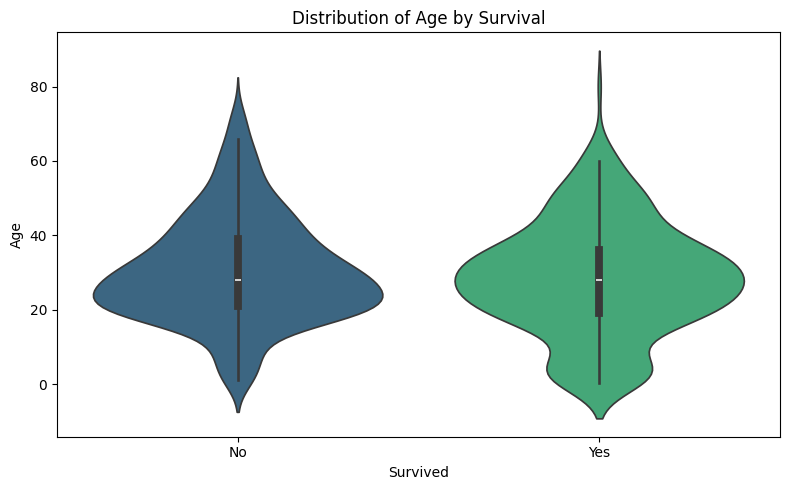

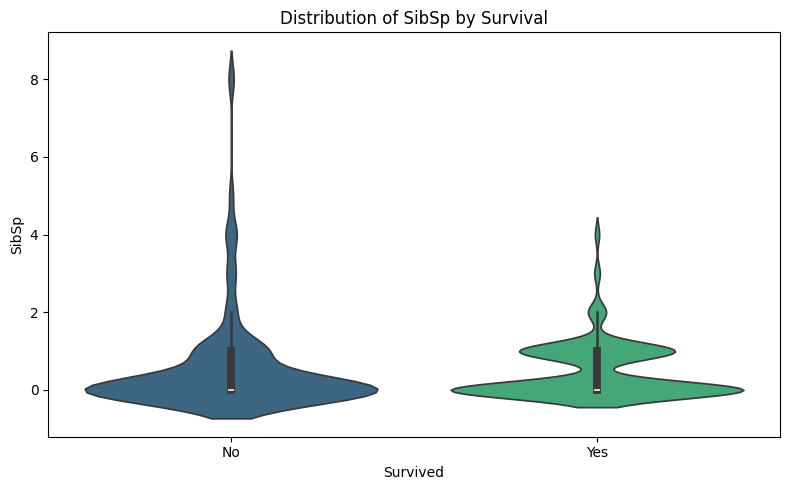

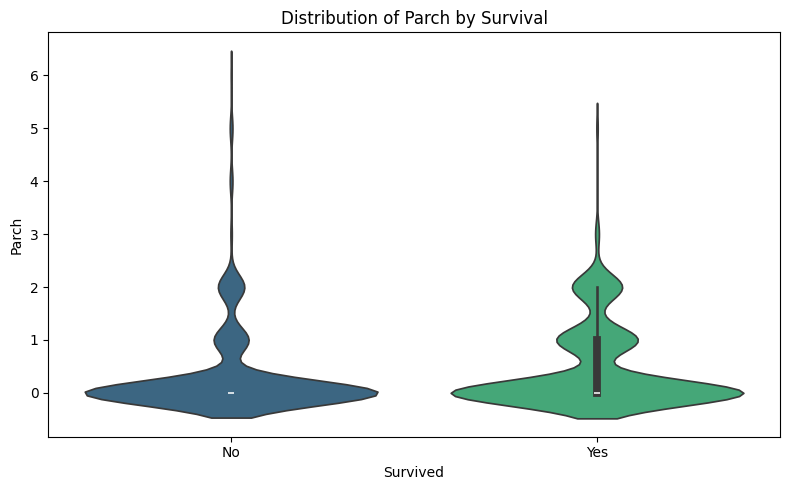

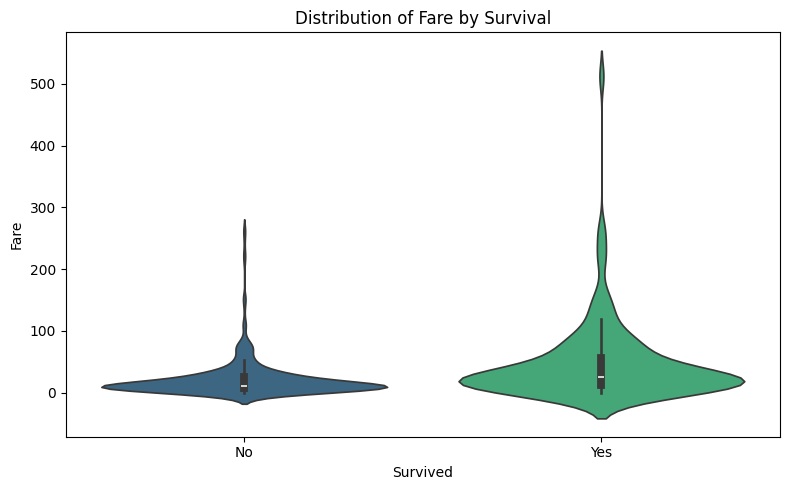

All requested relationship plots displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing relationships between features and 'Survived':\n")

# --- Categorical features vs. Survived ---
print("Categorical features vs. Survived:")
for col in categorical_cols:
    if col != 'Survived': # Exclude 'Survived' itself when plotting against 'Survived'
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue='Survived', palette='viridis')
        plt.title(f'Survival Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()

# --- Numerical features vs. Survived ---
print("\nNumerical features vs. Survived:")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x='Survived', y=col, hue='Survived', legend=False, palette='viridis') # Added hue and legend=False
    plt.title(f'Distribution of {col} by Survival')
    plt.xlabel('Survived')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()

print("All requested relationship plots displayed.")

## Final Task

### Subtask:
Summarize the key findings from the EDA, including any identified issues (like missing data) and interesting patterns or relationships observed in the Titanic dataset.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The dataset contains 891 entries (passengers) and 12 columns.
*   **Missing Values**:
    *   The `Cabin` column has a significant amount of missing data, approximately 77.10% (687 out of 891 entries).
    *   The `Age` column also has a notable percentage of missing values, about 19.87% (177 out of 891 entries).
    *   The `Embarked` column has a minor amount of missing data, approximately 0.22% (2 out of 891 entries).
*   **Survival Rate**: Approximately 38% of the passengers survived the disaster.
*   **Demographics & Characteristics**:
    *   There were significantly more male passengers (577) than female passengers (314).
    *   Most passengers (644) embarked from Southampton (`S`), followed by Cherbourg (`C`) (168) and Queenstown (`Q`) (77).
    *   The majority of passengers (491) were in Pclass 3, with fewer in Pclass 1 (216) and Pclass 2 (184).
*   **Numerical Feature Distributions**:
    *   `Age` ranges from 0.42 to 80 years, with a mean of approximately 29.7 and a median of 28, indicating a slight right skew and some older passenger outliers.
    *   `Fare` exhibits a wide range (from \$0 to approximately \$512) and a high standard deviation ($\approx\$49.69), suggesting a heavily right-skewed distribution with many passengers paying low fares and a few paying very high fares, leading to numerous outliers on the higher end.
    *   `SibSp` and `Parch` columns indicate that many passengers traveled alone, with most values concentrated at 0, but with outliers showing larger family groups.
*   **Relationships with Survival**:
    *   **Sex**: Females had a considerably higher survival rate than males.
    *   **Pclass**: Passengers in Pclass 1 showed a significantly higher survival rate compared to Pclass 2 and Pclass 3, with Pclass 3 having the lowest survival rate.
    *   **Age**: Younger passengers (especially children) tended to have a higher survival rate, while the age distribution of survivors appears to be slightly younger on average than non-survivors.
    *   **Fare**: Passengers who paid higher fares generally had a greater chance of survival.
    *   **Embarked**: Passengers who embarked from Cherbourg (`C`) had a higher survival rate than those from Southampton (`S`) or Queenstown (`Q`).

### Insights or Next Steps

*   **Missing Data Handling**: Develop strategies for imputing or handling missing values in `Age` (e.g., mean, median, or more sophisticated methods) and `Embarked` (e.g., mode). For `Cabin`, due to the high percentage of missingness, consider creating a new 'Missing' category or dropping the column entirely if its utility for prediction is low.
*   **Feature Engineering**: Explore creating new features from existing ones, such as 'FamilySize' (combining `SibSp` and `Parch`), 'AgeGroup', or 'FareCategory', which could capture non-linear relationships and improve model performance.


# Task
The EDA of the Titanic dataset is complete. The summary covers the key findings, including data structure, missing values, distributions of features, and relationships with survival, as well as providing insights and next steps for further analysis or model building.

```json
{"command": "FINISH"}
```

## Final Task

### Subtask:
Summarize the key findings from the EDA, including any identified issues (like missing data) and interesting patterns or relationships observed in the Titanic dataset.


## Summary:

### Data Analysis Key Findings

*   **Missing Data:** Significant missing values were identified in key columns: `Cabin` (highly missing, suggesting it might be dropped or require extensive feature engineering), `Age` (requiring imputation), and `Embarked` (with a small number of missing entries, amenable to imputation with the mode).
*   **Survival Rate:** The dataset showed that approximately 38% of passengers survived the Titanic disaster, indicating a class imbalance that should be considered during model training.
*   **Gender Impact on Survival:** A strong correlation was observed between gender and survival, with a notably higher survival rate among female passengers compared to male passengers.
*   **Passenger Class Impact on Survival:** Passenger class (`Pclass`) was a significant predictor of survival, with passengers in higher classes having a substantially greater chance of survival than those in lower classes.
*   **Age and Survival:** The distribution of age showed that children (younger passengers) had a higher survival rate, while survival rates generally decreased with increasing age, though specific age bands might reveal more nuanced patterns.
*   **Fare and Survival:** Passengers who paid higher fares tended to have a higher probability of survival, correlating with `Pclass` as higher fares are typically associated with higher classes.
*   **Family Size:** Features like `SibSp` (siblings/spouses aboard) and `Parch` (parents/children aboard) indicated that passengers traveling with a small family group had a better chance of survival compared to those traveling alone or with very large families.

### Insights or Next Steps

*   **Data Preprocessing and Imputation:** Prioritize addressing missing values through appropriate imputation strategies for `Age` and `Embarked`. The `Cabin` feature may require a decision on whether to drop it or engineer new features from its partial information due to its high sparsity.
*   **Feature Engineering:** Create new predictive features, such as `FamilySize` (combining `SibSp` and `Parch`), `IsAlone`, or `Title` extracted from the `Name` column, as these could provide stronger signals for survival prediction.
